# Aprendizaje de reglas de autómatas celulares




### Inteligencia Artificial
### Grado en Ingeniería Informática - Ingeniería del Software
### Universidad de Sevilla

#### Trabajo realizado por:
#### Álvaro Sánchez González
#### Alejandro Sanabria Cabeza


In [ ]:
import numpy
import pandas

In [ ]:
pip install deap

     |████████████████████████████████| 163kB 8.1MB/s 


##1. Introducción y objetivos
Los automatas celulares son un modelo de computacion que usa reglas prede
nidas para evolucionar el estado de sus celdas. Sea C una conguracion de un
automata celular, se obtiene la conguracion (C) usando , funcion denida a
partir de las reglas del sistema. Estos sistemas se usan actualmente, por ejemplo,
para la modelizacion de sistemas complejos [1]. En este marco de computacion
tambien se puede modelizar cierto tipo de problemas matematicos.
Los automatas celulares elementales son automatas celulares unidimensionales,
con dos estados posibles (0 y 1) y cuyas reglas estan denidas a partir del
estado actual de la propia celda y sus dos vecinas. Pero no solo existen automatas
celulares unidimensionales. El juego de la vida, dise~nado por John Conway,
es un automata bidimensional que, guiado por unas reglas muy sencillas, es
capaz de reproducir comportamientos muy complejos; de hecho, gracias a una
serie de patrones en el mismo, se puede alcanzar una capacidad de computacion
equivalente a un ordenador convencional.
El uso de algoritmos de aprendizaje automatico para conseguir un comportamiento
adecuado puede llevar a una aceleracion en cuanto a la resolucion de
algunos problemas.
El objetivo principal de este trabajo es el de ser capaz de manejar algoritmos
geneticos aplicandolos a un modelo de computacion como el de los
automatas celulares.
Para ello, se buscara alcanzar los siguientes objetivos especcos:
1. Comprender la teora basica detras del funcionamiento de los automatas
celulares.
2. Entender el procedimiento de uso de algoritmos geneticos para el aprendizaje
automatico.
3. Aprender a usar la biblioteca sklearn-genetic
4. Comprender el signicado de cada uno de los parametros usados en algoritmos
geneticos y saber detallar las diferencias de uso de los mismos.
5. Documentar el trabajo realizado usando un formato de artculo cientco.
6. Realizar una presentacion (PDF, PowerPoint o similar) de los resultados
obtenidos.

##2. Descripción del trabajo
###2.1. Metodología
Para el estudio en profundidad de automatas celulares y algoritmos geneticos
se usaran el libro A New Kind of Science [3] de Stephen Wolfram (en ingles, en
especial, captulos 2 y 3) y el libro An Introduction to Genetic Algorithms [2]
de Melanie Mitchell (en ingles, en especial, captulo 4), respectivamente.
El trabajo constara de tres apartados, que daran lugar a sendos automatas
celulares destinados a la resolucion de un problema en particular. En este caso,
dada una conguracion inicial, se debera llegar a una conguracion objetivo
basandonos en unos requisitos indicados en cada problema. Tras la ejecucion
del algoritmo, se deberan devolver los siguientes elementos:
* Los parametros utilizados en el algoritmo (como el numero de generaciones
y las probabilidades de cruce y mutacion, entre otros).
* La regla que haya obtenido mejor puntuacion.
* El tiempo que ha tardado en ejecutarse el algoritmo.
* Se valorara positivamente una graca donde se pueda observar la evolucion
de un automata celular con la mejor regla obtenida.
Los distintos problemas a resolver seran los siguientes:

1. Un automata celular capaz de resolver el problema de la mayora, denido
como sigue: Sea p la relacion de 1s con respecto a 0s que aparecen en la
conguracion inicial.
* Si p > 0; 5, entonces la conguracion objetivo (nal) sera una cuyo
estado de todas las celdas sea 1.
* Si p < 0; 5, entonces la conguracion objetivo (nal) sera una cuyo
estado de todas las celdas sea 0.
* Si p = 0; 5, el resultado no esta determinado (podra ir a cualquiera
de los estados objetivo anteriores).

  Se usara para este apartado un automata celular elemental.

In [ ]:
import array
import random
import numpy as np
import matplotlib.pyplot as plt
 
 
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
 
#Establecemos el individuo como array de binarios, que busca un fitness mínimo
creator.create("FitnessMin", base.Fitness, weights=[-1.0])
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMin)
 
toolbox = base.Toolbox()
 
# Generador de booleanos
toolbox.register("attr_bool", random.randint, 0, 1)
 
# Inicializando individuos y populacion
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 8)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


def aplicarRegla(regla, num1, num2, num3):
  posicion = num1*4 + num2*2 + num3
  # posicion establece donde buscar en la regla, pero si leyeramos de derecha a
  # izquierda, asi que se le resta a la longitud de la regla
  posicion = len(regla)-1-posicion
  sol2 = int(regla[posicion])
  return sol2
 
def ejecutarIteracion(lista, regla):
  # Regla = int binario de 8 caracteres, lista = lista de int del 0 al 1
  listaSolucion= []
  i=0
  longitud = len(lista)
  while(i<longitud-1):
    num = aplicarRegla(regla,lista[i-1],lista[i],lista[i+1])
    listaSolucion.append(num)
    i+=1
  # Como el ultimo valor de la lista es un punto de fallo, se hace aparte.
  numF = aplicarRegla(regla,lista[longitud-2],lista[longitud-1],lista[0])
  listaSolucion.append(numF)
  return listaSolucion
 
def ejecutarCelulaAutomata(lista,regla):
  # Regla = int binario de 8 caracteres, lista = lista de int del 0 al 1
  listOfList = [lista]
  listaAux = lista
  iter = 0
  # Si se repite el elemento en la lista, se hace un bucle, asi que es 
  # una funcion de corte
  while(listOfList.count(listaAux)<=1 and iter<=50):
    listaAux = ejecutarIteracion(listaAux,regla)
    listOfList.append(listaAux)
    iter+=1
  return listOfList
 
def evaluation(individual):
    fitness=0
    #Se evalua cada regla 50 veces, y el fitness final es la suma de todas ellas
    for x in range(0, 50):
      array = np.random.randint(low=0, high=2, size=8)
      lista = array.tolist()
      p = sum(lista)/len(lista)
      listOfList = ejecutarCelulaAutomata(lista,individual.tolist())
      # Si cualquiera de las soluciones no se encontrara en la lista, se penaliza
      try:
        pos1 = listOfList.index([1,1,1,1,1,1,1,1])
      except:
        maximo = 0
        for l in listOfList:
          suma = sum(l)
          if(maximo<suma):
            maximo = suma
        pond= maximo/len(lista)
        pos1 = 1000*(1-pond)
      try:
        pos0 = listOfList.index([0,0,0,0,0,0,0,0])
      except:
        minimo = 8
        for l in listOfList:
          suma = sum(l)
          if(minimo>suma):
            minimo = suma
        pond= minimo/len(lista)
        pos0 = 1000*pond
      if(p>0.5):
        fitness += pos1
      elif(p<0.5):
        fitness += pos0
      else:
        fitness += min([pos1,pos0])
    return fitness,

#Definimos como vamos a evaluar, cruzar y mutar.
 
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
 
def binario_a_decimal(binario):
    posicion = 0
    decimal = 0
    binario = binario[::-1]
    for digito in binario:
        # Elevar 2 a la posición actual
        multiplicador = 2**posicion
        decimal += int(digito) * multiplicador
        posicion += 1
    return decimal
 
 
def main():
    pop = toolbox.population(n=64)
    print("  Indv %s" % pop)
    hof = tools.HallOfFame(2)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.1, ngen=100, 
                                   stats=stats, halloffame=hof, verbose=True)
 
    return pop, stats, hof
 
if __name__ == "__main__":
    pop,stats,hof=main() #Ejecucion del algoritmo genetico
    regla = binario_a_decimal(hof[0])
    print("La regla mas ganadora es: " + str(regla))
    print(evaluation(hof[0]))

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


  Indv [Individual('b', [0, 1, 0, 1, 1, 0, 0, 0]), Individual('b', [0, 0, 1, 0, 0, 0, 1, 0]), Individual('b', [1, 0, 1, 1, 0, 0, 1, 1]), Individual('b', [1, 0, 0, 0, 0, 0, 1, 1]), Individual('b', [0, 1, 1, 0, 1, 1, 0, 1]), Individual('b', [1, 0, 1, 0, 1, 0, 1, 1]), Individual('b', [1, 1, 1, 1, 1, 0, 0, 0]), Individual('b', [0, 1, 0, 0, 0, 1, 0, 0]), Individual('b', [1, 0, 1, 0, 0, 1, 1, 1]), Individual('b', [0, 1, 0, 0, 1, 0, 0, 1]), Individual('b', [0, 1, 0, 0, 1, 0, 0, 1]), Individual('b', [0, 0, 1, 1, 0, 1, 1, 0]), Individual('b', [1, 1, 0, 0, 0, 1, 1, 0]), Individual('b', [1, 1, 0, 0, 1, 1, 1, 0]), Individual('b', [1, 1, 0, 0, 0, 0, 1, 1]), Individual('b', [0, 0, 1, 1, 0, 0, 1, 1]), Individual('b', [1, 1, 0, 0, 0, 1, 1, 0]), Individual('b', [1, 0, 0, 1, 1, 0, 1, 1]), Individual('b', [1, 0, 0, 0, 0, 1, 1, 0]), Individual('b', [0, 0, 1, 0, 0, 1, 0, 1]), Individual('b', [1, 1, 1, 0, 0, 1, 0, 0]), Individual('b', [0, 0, 1, 1, 0, 1, 0, 0]), Individual('b', [0, 0, 1, 0, 1, 0, 1, 0]), Ind

Imprimimos ahora un ejemplo de la regla ganadora. (Es un ejemplo, no tiene porque dar la solución esperada)


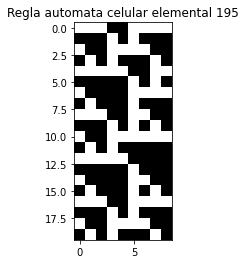

In [ ]:
input_pattern = numpy.zeros([8, 3])
reglabin=hof[0]
for i in range(8):
  input_pattern[i,:] = [int(x) for x in numpy.binary_repr(7-i, width=3)]

input_pattern

colums = 9
rows = 20

canvas = numpy.zeros([rows,colums+2])
array = np.random.randint(low=0, high=2, size=8)
lista = array.tolist()
for i in range(0,8):
  if(lista[i]==1):
    canvas[0,i]=1

for i in numpy.arange(0,rows-1):
  for j in numpy.arange(0, colums):
    for k in range(8):
      if numpy.array_equal(input_pattern[k,:], canvas[i,j:j+3]):
        canvas[i+1,j+1] = reglabin[k]

plt.imshow(canvas[:, 1:colums+1],cmap='Greys',interpolation='nearest')
plt.title("Regla automata celular elemental {}".format(regla))
plt.show()


2. Un automata celular capaz de resolver el problema de la paridad, definido
como sigue: Sea n el numero de 1s que aparecen en la conguracion inicial.
* Si n es un número par, entonces la conguracion objetivo (final) será
una cuyo estado de todas las celdas sea 1.
* Si n es un número impar, entonces la conguracion objetivo (final)
sera una cuyo estado de todas las celdas sea 0.
  
  Se usará para este apartado un automata celular bidimensional (2 estados).

In [ ]:
import array
import random
import numpy as np
import matplotlib.pyplot as plt
 
 
from deap import algorithms
from deap import base
from deap import creator
from deap import tools


creator.create("FitnessMin", base.Fitness, weights=[-1.0])
creator.create("Individual", list, fitness=creator.FitnessMin)
 
toolbox = base.Toolbox()
def ruleGenerator():
  #Genera reglas con valores aleatorios, y comprueba que dichos valores
  #cumple las restricciones(0, 1 o 2 numeros del 1 al 8)
  array = np.random.randint(low=-1, high=88, size=2)
  letters=["B","S"]
  sol = ""
  i=0
  for x in array.tolist():
    sol += letters[i]
    i+=1
    if(x!=-1):
      lista = [int(d) for d in str(x)]
      if(len(str(x))==1):
        if(x!=9):
          if(np.random.randint(low=0, high=2)==1):
            sol+=str(x)
          else:
            if(x!=0):
              sol+="0"+str(x)
        else:
          sol+=str(np.random.randint(low=0, high=9))
      else:
        while("9" in str(x) or lista[0]>=lista[1]):
          x = np.random.randint(low=0, high=88)
          if(len(str(x))==1 and x!=9):
            break     
          lista = [int(d) for d in str(x)]
        sol+=str(x)
  return sol



# Registramos el generador en el toolbox
toolbox.register("attr_str", ruleGenerator)
 
# Inicializamos como va a ser cada individuo y poblacion
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_str, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def formatearRegla(regla):
  #Recoge los integers de la regla como string, por si esta vacío
  lista = regla.split("S")
  aux = lista[0].split("B")
  try:
    b=aux[1]
  except:
    b=""
  try:
    s=lista[1]
  except:
    s=""
  return b,s

def aplicarReglaBidimensional(b, s, lista, x, y):
  #Dada una posicion en la lista (x,y), aplica la regla segun el valor en la casilla
  sol = lista[x][y]
  #m y n son variables auxiliares necesarias para la ultima columna y fila de
  #la matrix y asi evitar un ArrayIndexError
  m=x+1
  n=y+1
  if(sol==0):
    if(b!=""):
      if(m==len(lista[0])):
         m=0
      if(n==len(lista)):
         n=0
      sum = lista[m][y] + lista[x-1][n]+ lista[m][n] +lista[m][y-1] + lista[x-1][y-1]+ lista[x-1][n]+lista[x][n]+lista[x][y-1]
      if(len(b)==2):
        numList = [int(digit) for digit in b]
        if(numList[0]<=sum<=numList[1]):
          sol=1
      else:
        if(int(b)==sum):
          sol=1
  else:
    if(s!=""):
      if(m==len(lista[0])):
         m=0
      if(n==len(lista)):
         n=0
      sum = lista[m][y] + lista[x-1][n]+ lista[m][n] +lista[m][y-1] + lista[x-1][y-1]+ lista[x-1][n]+lista[x][n]+lista[x][y-1]
      if(len(s)==2):
        numList = [int(digit) for digit in s]
        if(numList[0]<=sum<=numList[1]):
          sol=1
        else:
         sol=0
      else:
        if(int(s)==sum):
          sol=1
        else:
         sol=0
  return sol

def ejecutarIteracion(matrix, regla):
  #Regla = string, matrix = lista de lista de int de 0 a 1
  matrixSolucion= []
  i=0
  filas = len(matrix)
  columnas = len(matrix[0])
  b,s = formatearRegla(regla)
  while(i<filas):
    listaSolucion = []
    j=0
    while(j<columnas):
      num = aplicarReglaBidimensional(b,s,matrix,i,j)
      listaSolucion.append(num)
      j+=1
    matrixSolucion.append(listaSolucion)
    i+=1
  return matrixSolucion


def ejecutarCelulaAutomata(matrix,regla):
  #Regla = string, matrix = lista de lista de int de 0 a 1
  listOfMatrix = [matrix]
  matrixAux = matrix
  iter = 0
  matrixOnes = np.ones((5,5),dtype=int)
  matrixZeros = np.zeros((5,5),dtype=int)
  while(np.logical_and(listOfMatrix.count(matrixAux)<=1, iter<=200)):
    matrixAux = ejecutarIteracion(matrixAux,regla)
    listOfMatrix.append(matrixAux)
    iter+=1
  return listOfMatrix

def evaluation(individual):
    fitness=0
    #Se evalua cada regla 50 veces, y el fitness final es la suma de todas ellas
    for x in range(0, 20): 
      array = np.random.randint(low=0, high=2, size=(5,5))
      matrix = array.tolist()
      numUnos = 0
    
      for x in matrix:
        numUnos+=sum(x)
    
      listOfMatrix = ejecutarCelulaAutomata(matrix,individual[0])
      try:
       matrixOnes = np.ones((5,5),dtype=int)
       pos1 = listOfMatrix.index(matrixOnes.tolist())
      except:
        pos1 = 1000
      try:
       matrixZeros = np.zeros((5,5),dtype=int)
       pos0 = listOfMatrix.index(matrixZeros.tolist())
      except:
        pos0 = 1000
    
      if(numUnos%2==0):
        fitness += pos1
      else:
        fitness += pos0
    return fitness,
def cruceReglaBidimensional(ind1,ind2):
  b1,s1 = formatearRegla(ind1[0])
  b2,s2 = formatearRegla(ind2[0])
  sol1 = "B"+str(b2)+"S"+str(s1)
  sol2 = "B"+str(b1)+"S"+str(s2)
  ind1[0]=sol1
  ind2[0]=sol2
  return ind1,ind2
def mutacionReglaBidimensional(ind, indpb):
  #Tener en cuenta los tres tipos de mutacion que hay
  b1,s1 = formatearRegla(ind[0])
  lista = [b1,s1]
  for x in range(0,2):
    if random.random() < indpb:
      if(len(lista[x])==0):
        #""="0"
        lista[x]="0"
      elif(len(lista[x])==1):
        if(int(lista[x])+1==9):
          # X = X-1
          lista[x]=str(int(lista[x])-1)
        else:
          # X = X+1
          lista[x]=str(int(lista[x])+1)
      else:
        numList = [int(digit) for digit in lista[x]]
        if(numList[0]+1>=numList[1]):
          if(numList[1]!=8):
            # XY = X(Y+1)
            lista[x]=str(numList[0])+str(numList[1]+1)
          else:
            # XY = (X-1)Y
            lista[x]=str(numList[0]-1)+str(numList[1])
        else:
          # XY = (X+1)Y
          lista[x]=str(numList[0]+1)+str(numList[1])
  ind[0]= "B"+lista[0]+"S"+lista[1]
  return ind,

#Definimos como vamos a evaluar, cruzar y mutar.

toolbox.register("evaluate", evaluation)
toolbox.register("mate", cruceReglaBidimensional)
toolbox.register("mutate", mutacionReglaBidimensional, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    pop = toolbox.population(n=150)
    print("  Indv %s" % pop)
    hof = tools.HallOfFame(3)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.1, ngen=20, 
                                   stats=stats, halloffame=hof, verbose=True)
 
    return pop, stats, hof

if __name__ == "__main__":
    pop,stats,hof=main()
    regla = hof[0:3]
    print(regla)
    print(evaluation(hof[0]))
    print(evaluation(hof[1]))
    print(evaluation(hof[2]))









/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


  Indv [['B56S8'], ['B8S'], ['B04S16'], ['B34S'], ['B27S26'], ['B27S23'], ['B15S06'], ['B47S56'], ['B45S23'], ['B24S56'], ['B18S1'], ['B4S3'], ['B28S'], ['B24S3'], ['B12S48'], ['B34S45'], ['B25S78'], ['B0S6'], ['B27S57'], ['B12S7'], ['B5S24'], ['B67S26'], ['B8S15'], ['B45S26'], ['B68S37'], ['B38S78'], ['B34S35'], ['B7S78'], ['B25S48'], ['B67S6'], ['B47S1'], ['B25S47'], ['B05S35'], ['B38S6'], ['B58S47'], ['B17S78'], ['B34S7'], ['BS23'], ['B34S67'], ['B1S16'], ['B03S36'], ['B25S0'], ['B45S17'], ['B57S23'], ['B2S34'], ['B36S47'], ['B35S37'], ['B15S35'], ['B25S4'], ['B8S47'], ['B07S46'], ['B18S13'], ['B47S5'], ['B26S1'], ['B57S25'], ['B34S16'], ['B24S15'], ['B24S06'], ['B15S7'], ['B15S17'], ['B57S07'], ['B28S45'], ['B2S02'], ['B46S4'], ['B45S68'], ['B24S'], ['B12S47'], ['B37S1'], ['B47S7'], ['B27S34'], ['B05S04'], ['B48S6'], ['B8S12'], ['B6S24'], ['B57S16'], ['B67S34'], ['B48S48'], ['B18S45'], ['B14S18'], ['B24S38'], ['B78S25'], ['B27S6'], ['B38S48'], ['B46S35'], ['B37S78'], ['B38S7'], ['B

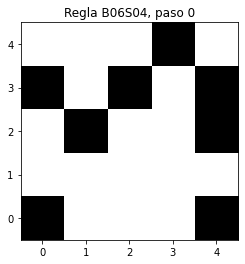

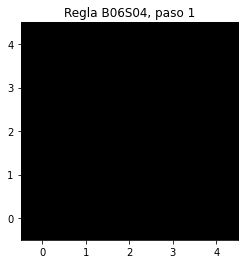

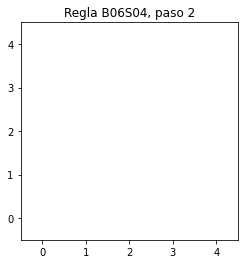

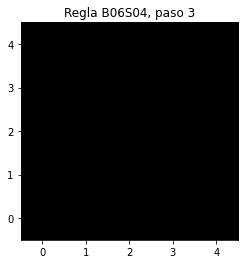

In [ ]:
canvas = np.random.randint(low=0, high=2, size=(5,5))
regla=hof[2]
listOfMatrix = ejecutarCelulaAutomata(canvas.tolist(),regla[0])
iter=0;
for i in listOfMatrix:
  sol = np.zeros((6,6))
  for y in range(0,len(i)):
    for x in range(0,len(i[0])):
      if(i[x][y]==1):
        sol[x][y]=1
  plt.imshow(sol,cmap='Greys',interpolation='nearest')
  plt.xlim(-0.5,4.5)
  plt.ylim(-0.5,4.5)
  plt.title("Regla {}, paso {}".format(regla[0],iter))
  plt.show()
  iter+=1


3. El problema a resolver por una regla (que hay que encontrar) de un autómata celular elemental es el siguiente:


*   Devolver 1 en caso de que existan dos estados adyacentes iguales.
*   Devolver 0 en cualquier otro caso.


In [ ]:
import array
import random
import numpy as np
import matplotlib.pyplot as plt
 
 
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

#Establecemos el individuo como array de binarios, que busca un fitness mínimo
creator.create("FitnessMin", base.Fitness, weights=[-1.0])
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMin)
 
toolbox = base.Toolbox()
 
# Generador de int del 0 al 1 (binario)
toolbox.register("attr_bool", random.randint, 0, 1)
 
# Inicializador de 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 8)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def aplicarRegla(regla, num1, num2, num3):
  posicion = num1*4 + num2*2 + num3
  posicion = len(regla)-1-posicion
  sol2 = int(regla[posicion])
  return sol2

def ejecutarIteracion(lista, regla):
  #Regla = int binario de 8 caracteres, lista = lista de int
  listaSolucion= []
  i=0
  longitud = len(lista)
  while(i<longitud-1):
    num = aplicarRegla(regla,lista[i-1],lista[i],lista[i+1])
    listaSolucion.append(num)
    i+=1
  numF = aplicarRegla(regla,lista[longitud-2],lista[longitud-1],lista[0])
  listaSolucion.append(numF)
  return listaSolucion

def ejecutarCelulaAutomata(lista,regla):
  listOfList = [lista]
  listaAux = lista
  iter = 0
  while(listOfList.count(listaAux)<=1 and iter<=100):
    listaAux = ejecutarIteracion(listaAux,regla)
    listOfList.append(listaAux)
    iter+=1
  return listOfList

def evaluation(individual):
    fitness=0
    for x in range(0, 20):
      array = np.random.randint(low=0, high=2, size=10)
      lista = array.tolist()
      
      listOfList = ejecutarCelulaAutomata(lista,individual.tolist())
      try:
        pos1 = listOfList.index([1,1,1,1,1,1,1,1,1,1])
      except:
        pos1 = 100
      try:
        pos0 = listOfList.index([0,0,0,0,0,0,0,0,0,0])
      except:
        pos0 = 100
      
      repetido = 0
      for i in range(0,len(lista)-1):
        if(lista[i]==lista[i+1]):
          fitness+=pos1
          repetido = 1
          
          break
      if(repetido == 0):
        fitness+=pos0
          
    return fitness,
 
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def binario_a_decimal(binario):
    posicion = 0
    decimal = 0
    binario = binario[::-1]
    for digito in binario:
        # Elevar 2 a la posición actual
        multiplicador = 2**posicion
        decimal += int(digito) * multiplicador
        posicion += 1
    return decimal


def main():
    pop = toolbox.population(n=128)
    print("  Indv %s" % pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.1, ngen=50, 
                                   stats=stats, halloffame=hof, verbose=True)
 
    return pop, stats, hof

 
if __name__ == "__main__":
    pop,stats,hof=main()
    regla = binario_a_decimal(hof[0])
    print("La regla mas ganadora es: " + str(regla))
    print(evaluation(hof[0]))



/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


  Indv [Individual('b', [1, 0, 0, 1, 1, 0, 1, 1]), Individual('b', [1, 0, 0, 1, 0, 1, 1, 0]), Individual('b', [0, 1, 0, 1, 1, 1, 1, 0]), Individual('b', [1, 0, 0, 0, 1, 1, 0, 0]), Individual('b', [1, 0, 1, 1, 0, 0, 0, 0]), Individual('b', [0, 1, 1, 0, 0, 0, 1, 0]), Individual('b', [0, 1, 0, 0, 0, 0, 1, 0]), Individual('b', [0, 1, 1, 1, 0, 1, 0, 1]), Individual('b', [1, 0, 0, 0, 1, 0, 1, 0]), Individual('b', [1, 1, 0, 1, 1, 1, 1, 1]), Individual('b', [1, 1, 0, 1, 0, 0, 1, 1]), Individual('b', [0, 1, 1, 0, 0, 0, 1, 1]), Individual('b', [0, 0, 1, 1, 1, 0, 1, 0]), Individual('b', [1, 0, 0, 1, 0, 1, 0, 0]), Individual('b', [1, 0, 0, 1, 0, 0, 1, 0]), Individual('b', [1, 0, 0, 1, 1, 1, 1, 1]), Individual('b', [0, 0, 0, 0, 0, 0, 0, 1]), Individual('b', [0, 1, 0, 0, 0, 0, 0, 1]), Individual('b', [0, 0, 0, 0, 1, 1, 1, 1]), Individual('b', [1, 1, 1, 0, 0, 0, 1, 1]), Individual('b', [1, 1, 1, 1, 0, 1, 0, 1]), Individual('b', [0, 0, 0, 1, 0, 1, 0, 0]), Individual('b', [0, 0, 0, 0, 1, 1, 0, 1]), Ind

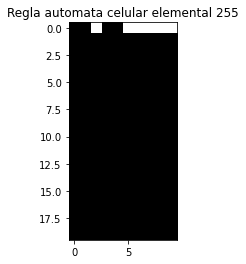

In [ ]:
input_pattern = numpy.zeros([8, 3])
reglabin=hof[0]
for i in range(8):
  input_pattern[i,:] = [int(x) for x in numpy.binary_repr(7-i, width=3)]

input_pattern

colums = 10
rows = 20

canvas = numpy.zeros([rows,colums+2])
array = np.random.randint(low=0, high=2, size=10)
lista = array.tolist()
for i in range(0,8):
  if(lista[i]==1):
    canvas[0,i]=1

for i in numpy.arange(0,rows-1):
  for j in numpy.arange(0, colums):
    for k in range(8):
      if numpy.array_equal(input_pattern[k,:], canvas[i,j:j+3]):
        canvas[i+1,j+1] = reglabin[k]

plt.imshow(canvas[:, 1:colums+1],cmap='Greys',interpolation='nearest')
plt.title("Regla automata celular elemental {}".format(regla))
plt.show()